## Visualizando a superfície de decisão e função do modelo

#### Bibliotecas

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

#### Features

In [2]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, weights=[.5, .5], random_state=15)

In [3]:
X[:10]

array([[ 0.82944377,  0.87469415],
       [-1.35989641, -0.60275371],
       [ 0.35466551, -0.50966937],
       [-1.71088888,  1.38437071],
       [-1.07617622, -1.00007067],
       [ 0.47945457, -0.24220938],
       [-0.42490458,  2.08261939],
       [ 0.41906228, -0.2525939 ],
       [-0.38432027, -0.13768226],
       [ 1.31672259,  1.29342882]])

In [4]:
y[:100]

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1])

#### Modelo

In [5]:
clf = LogisticRegression().fit(X, y)

#### Função logística para cada feature

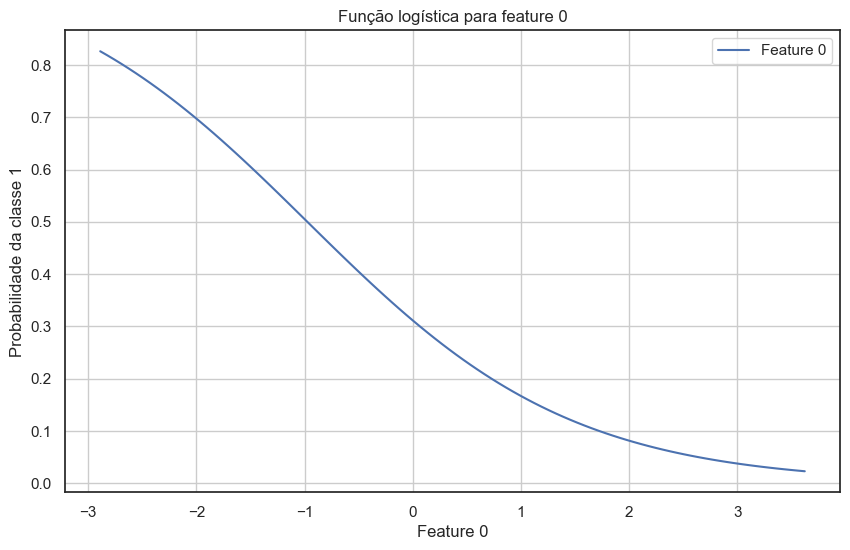

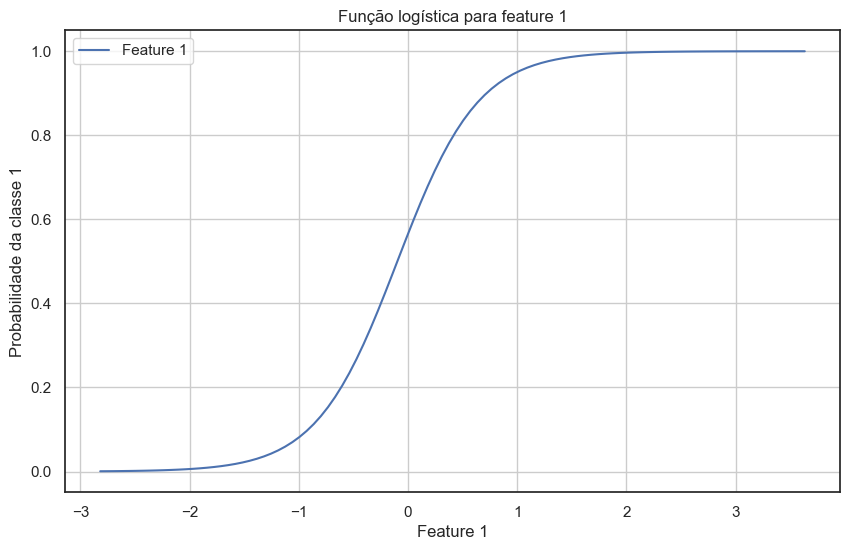

In [8]:
n_features = 2
for feature_index in range(n_features):

    feature_range = np.linspace(X[:, feature_index].min(), X[:, feature_index].max(), 100)

    median_value = np.median(X[:, 1-feature_index])
    fixed_features = np.tile(median_value, (100, 1))
    fixed_features = np.column_stack((feature_range, fixed_features)) if feature_index == 0 else np.column_stack((fixed_features, feature_range))

    probabilities = clf.predict_proba(fixed_features)[:, 1]

    plt.figure(figsize=(10, 6))
    plt.plot(feature_range, probabilities, label=f'Feature {feature_index}')
    plt.xlabel(f'Feature {feature_index}')
    plt.ylabel('Probabilidade da classe 1')
    plt.title(f'Função logística para feature {feature_index}')
    plt.grid(True)
    plt.legend()
    plt.show()


#### Superfície de decisão

In [6]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

In [7]:
probs.shape

(1000, 1000)

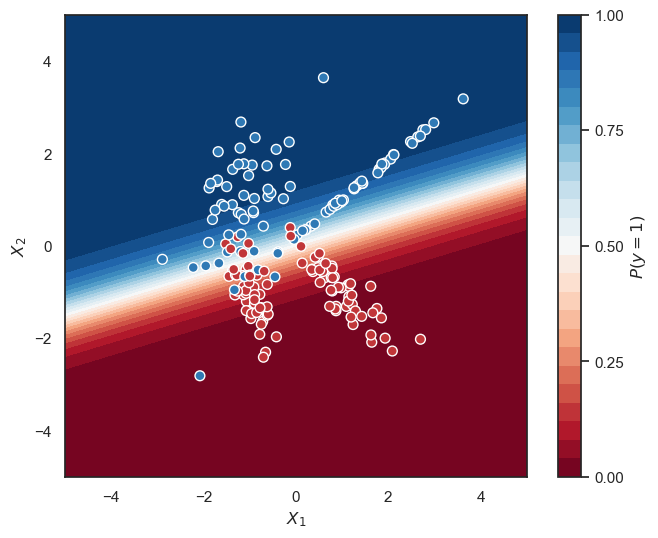

In [13]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$");